In [1]:
DATA_DIR = "../data/laks"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_clone_snvs = pd.read_csv(f"{DATA_DIR}/ov2295_clone_snvs.csv.gz", low_memory=False)
df_clone_snvs

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom
0,1,985349,G,A,A,18,0,18,0,0,0
1,1,985349,G,A,B,19,0,19,0,0,0
2,1,985349,G,A,C,14,0,14,0,0,0
3,1,985349,G,A,D,18,0,18,0,0,0
4,1,985349,G,A,E,6,10,23,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0
126608,X,154563943,T,A,F,0,10,14,1,1,0
126609,X,154563943,T,A,G,22,0,22,0,0,0
126610,X,154563943,T,A,H,10,0,10,0,0,0


In [4]:
df_clone_cn = pd.read_csv(f"{DATA_DIR}/ov2295_clone_cn.csv.gz")
df_clone_cn

,clone_id,chr,start,end,copy,total_cn,minor_cn,major_cn
0,E,1,1,500000,NaN,4,0,4
1,E,1,500001,1000000,NaN,4,0,4
2,E,1,1000001,1500000,4.906717,4,0,4
3,E,1,1500001,2000000,3.793922,4,0,4
4,E,1,2000001,2500000,5.130191,4,0,4
...,...,...,...,...,...,...,...,...
55849,F,Y,57000001,57500000,NaN,0,0,0
55850,F,Y,57500001,58000000,NaN,0,0,0
55851,F,Y,58000001,58500000,NaN,0,0,0
55852,F,Y,58500001,59000000,NaN,0,0,0


In [5]:
# All bins are of the same size
print((df_clone_cn["end"] - df_clone_cn["start"] + 1).unique())

bin_size = (df_clone_cn["end"] - df_clone_cn["start"] + 1).unique()[0]

[500000]


In [6]:
df_clone_snvs["bin_start"] = df_clone_snvs["coord"] // bin_size * bin_size + 1
df_clone_snvs_cn = pd.merge(
    df_clone_snvs,
    df_clone_cn,
    left_on=["clone_id", "chrom", "bin_start"],
    right_on=["clone_id", "chr", "start"],
    how='left',
)
df_clone_snvs_cn

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,bin_start,chr,start,end,copy,total_cn,minor_cn,major_cn
0,1,985349,G,A,A,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2
1,1,985349,G,A,B,19,0,19,0,0,0,500001,1,500001,1000000,NaN,2,0,2
2,1,985349,G,A,C,14,0,14,0,0,0,500001,1,500001,1000000,NaN,2,0,2
3,1,985349,G,A,D,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2
4,1,985349,G,A,E,6,10,23,1,1,0,500001,1,500001,1000000,NaN,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0,154500001,X,154500001,155000000,1.604020,2,0,2
126608,X,154563943,T,A,F,0,10,14,1,1,0,154500001,X,154500001,155000000,1.573432,2,0,2
126609,X,154563943,T,A,G,22,0,22,0,0,0,154500001,X,154500001,155000000,1.524319,2,0,2
126610,X,154563943,T,A,H,10,0,10,0,0,0,154500001,X,154500001,155000000,1.551737,2,0,2


## Pooling

In [7]:
from sklearn.cluster import SpectralBiclustering

In [8]:
df = df_clone_snvs_cn
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"].astype(str) + ":" + df["alt"].astype(str)
df_clone_snvs_cn

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,bin_start,chr,start,end,copy,total_cn,minor_cn,major_cn,mutation
0,1,985349,G,A,A,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
1,1,985349,G,A,B,19,0,19,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
2,1,985349,G,A,C,14,0,14,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
3,1,985349,G,A,D,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
4,1,985349,G,A,E,6,10,23,1,1,0,500001,1,500001,1000000,NaN,4,0,4,1:985349:G:A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0,154500001,X,154500001,155000000,1.604020,2,0,2,X:154563943:T:A
126608,X,154563943,T,A,F,0,10,14,1,1,0,154500001,X,154500001,155000000,1.573432,2,0,2,X:154563943:T:A
126609,X,154563943,T,A,G,22,0,22,0,0,0,154500001,X,154500001,155000000,1.524319,2,0,2,X:154563943:T:A
126610,X,154563943,T,A,H,10,0,10,0,0,0,154500001,X,154500001,155000000,1.551737,2,0,2,X:154563943:T:A


In [9]:
total_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='total_counts',
    aggfunc='sum',
    fill_value=0
)
total_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,10,21,5,24,24,6,24,24,14,5,...,8,11,6,23,7,11,8,1,20,3
B,6,13,7,16,30,5,9,10,12,6,...,7,12,7,5,3,9,6,3,8,9
C,13,11,6,8,23,4,15,15,5,5,...,6,12,4,8,4,11,5,4,6,10
D,13,15,5,26,36,10,19,19,11,9,...,4,8,8,7,18,20,8,7,12,7
E,27,35,27,51,54,26,64,64,66,22,...,15,26,21,18,30,27,13,21,20,28
F,16,18,15,30,24,21,31,31,29,12,...,11,12,2,16,12,8,7,13,7,12
G,18,16,16,42,45,23,38,38,52,10,...,12,12,9,13,20,19,7,17,11,22
H,14,18,16,22,20,13,23,23,21,13,...,13,5,8,6,5,11,8,10,7,5
I,24,19,19,32,26,21,31,32,30,14,...,13,18,7,10,23,8,8,9,10,10


In [10]:
alt_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='alt_counts',
    aggfunc='sum',
    fill_value=0
)
alt_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0,0,5,0,10,0,0,0,0,5,...,0,0,0,10,7,0,0,1,0,0
B,0,0,7,0,10,0,0,0,0,6,...,0,0,0,4,3,0,0,3,0,0
C,0,0,6,0,0,0,1,0,0,5,...,0,0,0,0,4,0,5,4,0,0
D,0,0,5,0,0,0,0,0,0,9,...,0,0,0,0,10,0,8,7,0,0
E,10,10,9,10,0,7,10,10,10,10,...,0,10,1,0,10,0,0,10,10,0
F,4,10,10,10,0,1,10,10,0,5,...,0,0,0,0,10,0,0,10,7,0
G,0,0,7,0,0,0,0,0,0,3,...,10,0,9,0,10,8,0,10,0,10
H,0,0,9,0,0,0,1,0,0,8,...,10,0,8,0,5,5,0,10,0,5
I,0,0,10,0,0,0,0,0,0,7,...,10,0,7,0,10,1,0,9,0,10


In [11]:
vaf_table = alt_table.div(total_table).replace(np.nan, 0)
vaf_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.00000,0.000000,1.000000,0.000000,0.416667,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.00000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,0.37037,0.285714,0.333333,0.196078,0.000000,0.269231,0.156250,0.156250,0.151515,0.454545,...,0.000000,0.384615,0.047619,0.000000,0.333333,0.000000,0.0,0.476190,0.5,0.000000
F,0.25000,0.555556,0.666667,0.333333,0.000000,0.047619,0.322581,0.322581,0.000000,0.416667,...,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.0,0.769231,1.0,0.000000
G,0.00000,0.000000,0.437500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.833333,0.000000,1.000000,0.000000,0.500000,0.421053,0.0,0.588235,0.0,0.454545
H,0.00000,0.000000,0.562500,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.615385,...,0.769231,0.000000,1.000000,0.000000,1.000000,0.454545,0.0,1.000000,0.0,1.000000
I,0.00000,0.000000,0.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.769231,0.000000,1.000000,0.000000,0.434783,0.125000,0.0,1.000000,0.0,1.000000


In [12]:
copy_number_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='total_cn',
    aggfunc='mean',
    fill_value=0
).astype(int)
copy_number_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
B,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
D,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
E,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
F,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
G,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
H,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
I,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2


In [13]:
F = (vaf_table * copy_number_table).clip(upper=1)
F.to_csv("../outputs/F.csv")
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [14]:
is_subclonal = (F > 0) & (F < 1)

subclonal_counts = is_subclonal.sum(axis=0)

subclonal_counts

mutation
10:100129846:C:A    0
10:100185101:A:G    0
10:100209326:T:C    0
10:100283942:C:T    1
10:10086005:G:T     1
                   ..
X:98278474:C:A      3
X:98452192:T:C      0
X:98700894:C:T      1
X:99136386:C:T      0
X:99571629:G:T      1
Length: 14068, dtype: int64

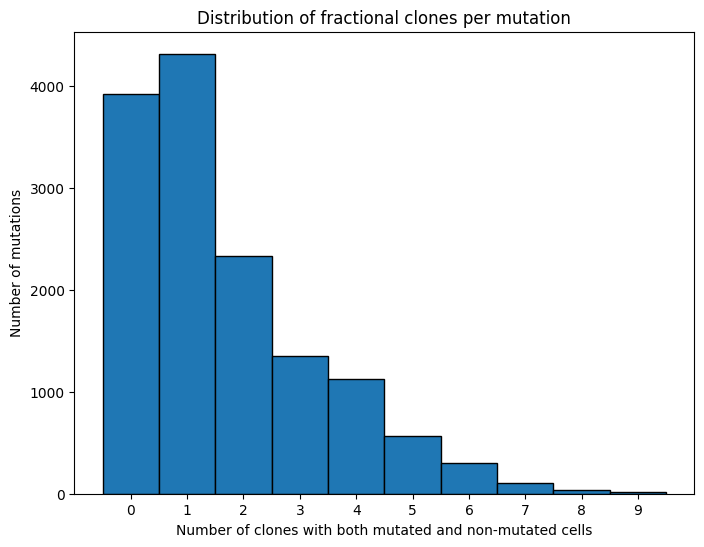

In [15]:
plt.figure(figsize=(8,6))
plt.hist(subclonal_counts, bins=range(subclonal_counts.max()+2), edgecolor="black", align="left")
plt.xlabel("Number of clones with both mutated and non-mutated cells")
plt.ylabel("Number of mutations")
plt.title("Distribution of fractional clones per mutation")
plt.xticks(range(subclonal_counts.max()+1))
plt.show()

In [16]:
distribution_of_subclonal_value_counts = subclonal_counts.value_counts().sort_index()
distribution_of_subclonal_value_counts

0    3921
1    4315
2    2331
3    1347
4    1128
5     569
6     302
7     109
8      32
9      14
Name: count, dtype: int64

In [17]:
is_mutation_with_atmost_1_subclonal_cluster = subclonal_counts[subclonal_counts <= 1]
is_mutation_with_atmost_1_subclonal_cluster

mutation
10:100129846:C:A    0
10:100185101:A:G    0
10:100209326:T:C    0
10:100283942:C:T    1
10:10086005:G:T     1
                   ..
X:97564955:T:C      1
X:98452192:T:C      0
X:98700894:C:T      1
X:99136386:C:T      0
X:99571629:G:T      1
Length: 8236, dtype: int64

In [18]:
mutations_to_keep = is_mutation_with_atmost_1_subclonal_cluster.index
F_cononical = F.loc[:, F.columns.isin(mutations_to_keep)]
F_cononical

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,10:102329766:C:A,...,X:94344991:T:G,X:96387929:A:T,X:96987846:A:C,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625,0.606061,1.0,1.0,...,1.0,0.0,0.933333,0.0,0.769231,0.095238,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000,0.000000,1.0,1.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000


In [19]:
from sklearn.cluster import SpectralBiclustering
import numpy as np
import seaborn as sns


def plot_spectral_clustering(F):
    model = SpectralBiclustering(n_clusters=7, method='log', random_state=0)
    model.fit(F.values)

    frac_biclust = F.iloc[np.argsort(model.row_labels_)]
    frac_biclust = frac_biclust.iloc[:, np.argsort(model.column_labels_)]

    sns.heatmap(frac_biclust, cmap='coolwarm')

    # Get where the cluster boundaries are
    row_order = np.argsort(model.row_labels_)
    col_order = np.argsort(model.column_labels_)

    row_clusters, row_counts = np.unique(model.row_labels_[row_order], return_counts=True)
    col_clusters, col_counts = np.unique(model.column_labels_[col_order], return_counts=True)

    row_lines = np.cumsum(row_counts)[:-1]
    col_lines = np.cumsum(col_counts)[:-1]

    # Plot with boundaries
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(frac_biclust, cmap='viridis', cbar=True)

    # Draw horizontal lines
    for r in row_lines:
        ax.axhline(r, color='white', lw=2)

    # Draw vertical lines
    for c in col_lines:
        ax.axvline(c, color='white', lw=2)

    plt.title("Spectral Biclustering of CF")
    plt.xlabel("Mutations")
    plt.ylabel("CN Cluster IDs")
    plt.show()

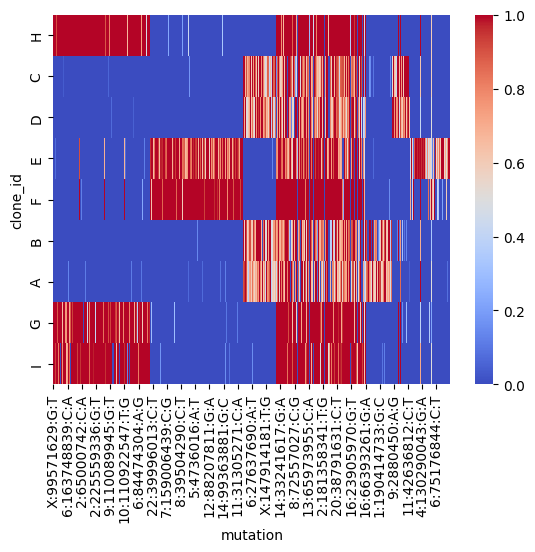

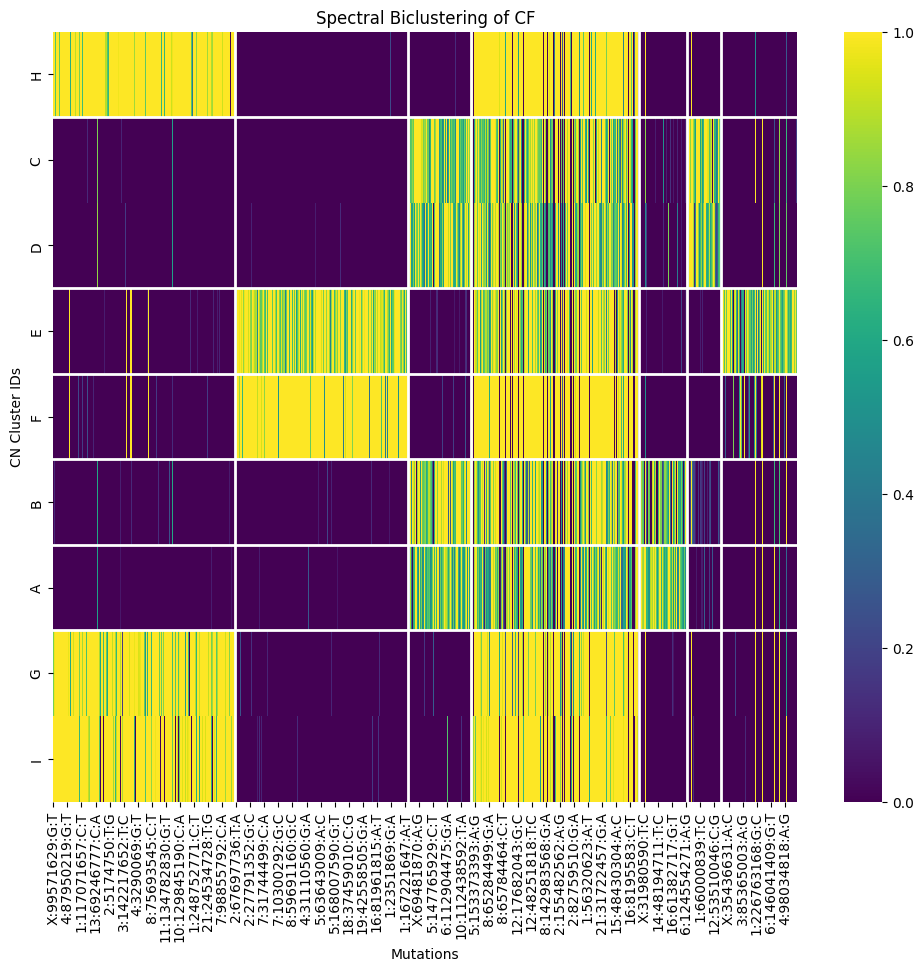

In [20]:
plot_spectral_clustering(F)

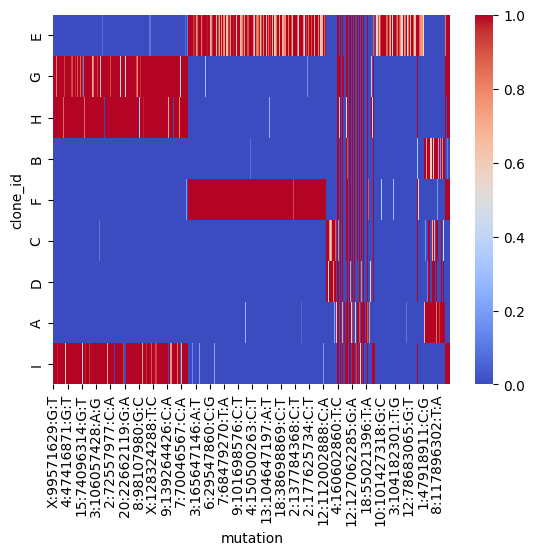

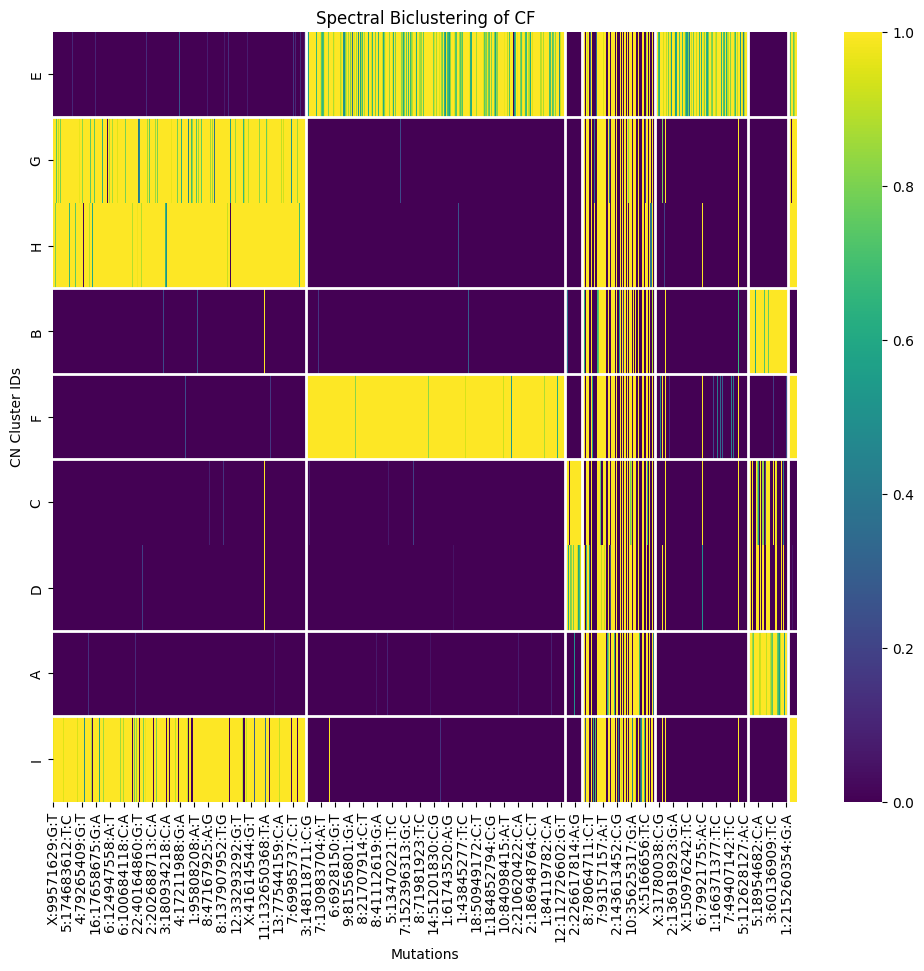

In [21]:
plot_spectral_clustering(F_cononical)

## Formulate constraints of according to chimani

---



## Let's use phertilizer clusters for clustering the mutations

In [22]:
PHERTILIZER_OUTPUTS = "../phertilizer-outputs/laks"
df_phertilizer_mutations = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/SNV_clusters.csv")
df_phertilizer_mutations

,cluster,mutation
0,7,chr10_10:100129846:C:A
1,7,chr10_10:100185101:A:G
2,0,chr10_10:100209326:T:C
3,7,chr10_10:100283942:C:T
4,5,chr10_10:10086005:G:T
...,...,...
13827,2,chrX_X:98278474:C:A
13828,4,chrX_X:98452192:T:C
13829,0,chrX_X:98700894:C:T
13830,7,chrX_X:99136386:C:T


In [23]:
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [24]:
df_phertilizer_mutations["mutation_"] = df_phertilizer_mutations["mutation"].str.split("_").str[1]
df_phertilizer_mutations

,cluster,mutation,mutation_
0,7,chr10_10:100129846:C:A,10:100129846:C:A
1,7,chr10_10:100185101:A:G,10:100185101:A:G
2,0,chr10_10:100209326:T:C,10:100209326:T:C
3,7,chr10_10:100283942:C:T,10:100283942:C:T
4,5,chr10_10:10086005:G:T,10:10086005:G:T
...,...,...,...
13827,2,chrX_X:98278474:C:A,X:98278474:C:A
13828,4,chrX_X:98452192:T:C,X:98452192:T:C
13829,0,chrX_X:98700894:C:T,X:98700894:C:T
13830,7,chrX_X:99136386:C:T,X:99136386:C:T


[0.73170732 0.875      0.83333333 0.76923077 0.98039216 1.
 1.         1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.55555556 0.66666667 0.64516129 0.60606061 0.8        1.
 1.         1.         1.        ]
[0.68965517 0.85714286 0.8        0.76923077 0.         0.
 1.         1.         1.        ]
[0.93333333 1.         1.         1.         0.         0.
 1.         1.         1.        ]
[0.5        0.64516129 0.66666667 0.61538462 0.         0.
 1.         1.         1.        ]
[0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0.         0.         0.         0.         0.         0.
 0.95238095 1.         1.        ]
[0.76923077 0.87026648 0.83333333 0.8        0.         0.
 0.         0.         0.        ]
[1. 1. 1. 1. 0. 0. 0. 0. 0.]
[0.60606061 0.69164456 0.66666667 0.625      0.         0.
 0.         0.         0.        ]
[0.   0.   0.8  0.75 0.   0.   0.   0.   0.  ]
[0.         0.10526316 1.         0.95238095 0.         0.
 0.         0.         0. 

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_86093/1675195184.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_86093/1675195184.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_86093/1675195184.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_86093/1675195184.py:

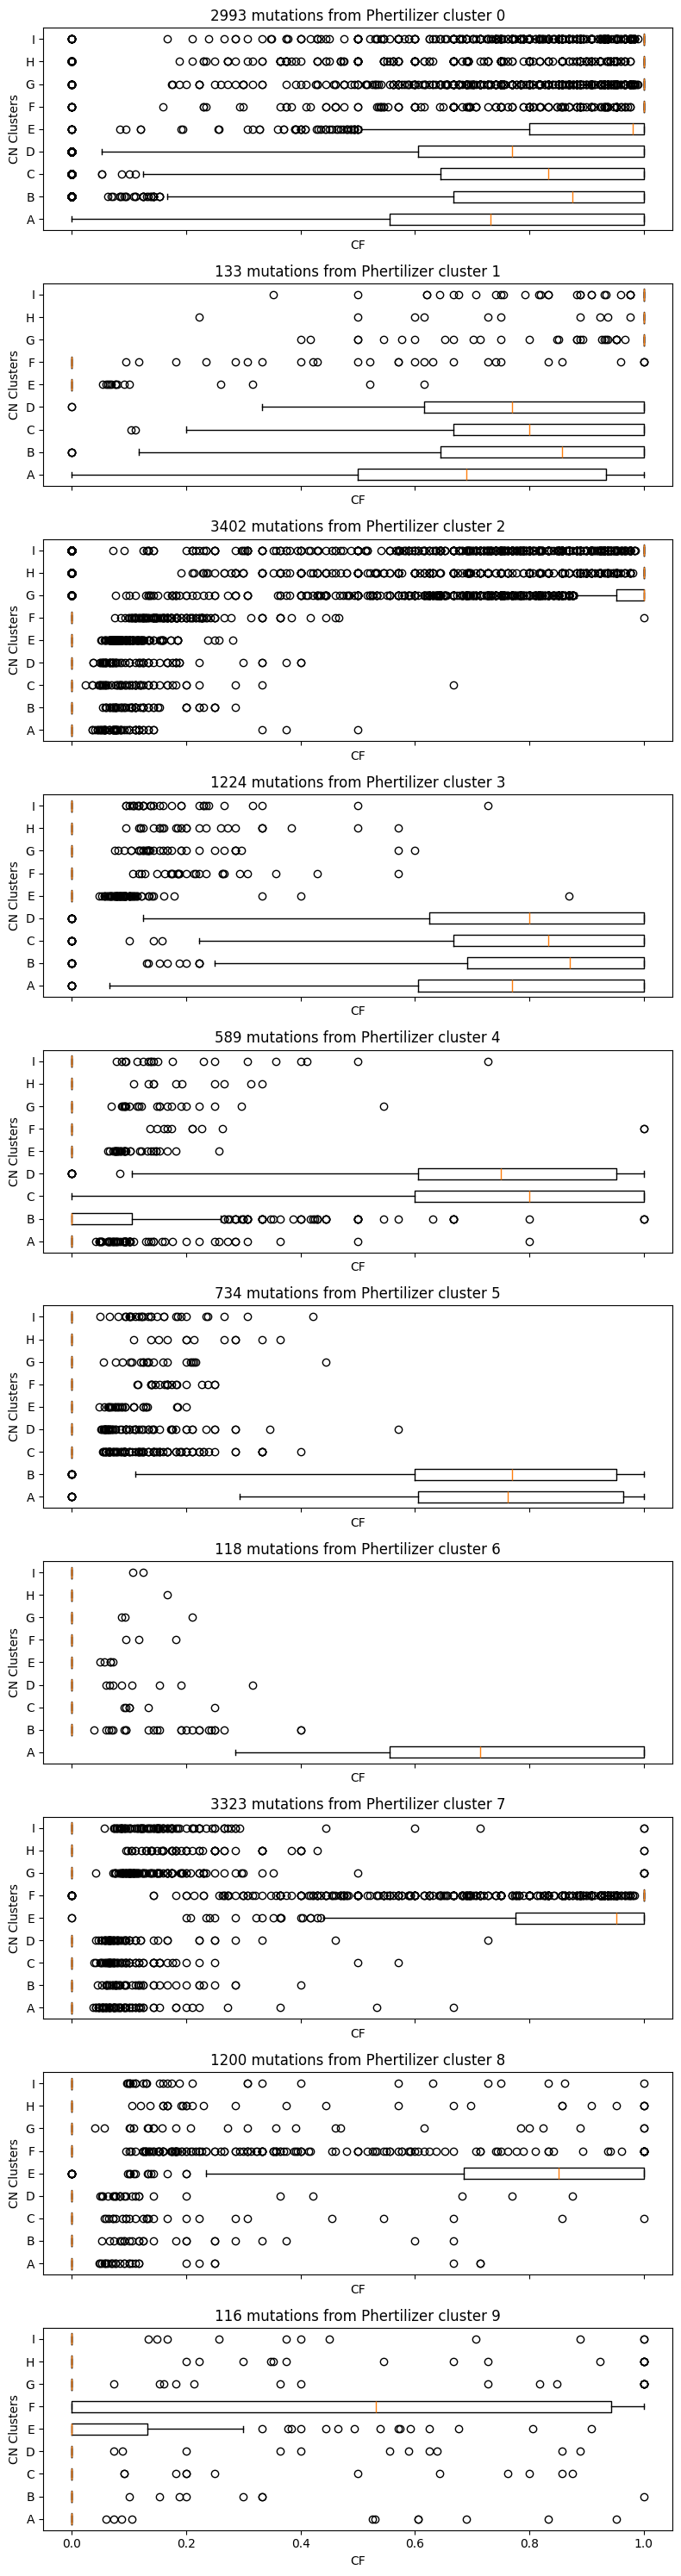

In [25]:
import matplotlib.pyplot as plt

clusters = sorted(df_phertilizer_mutations["cluster"].unique())
n_clusters = len(clusters)

fig, axes = plt.subplots(nrows=n_clusters, figsize=(8, 3*n_clusters), sharex=True)

# If only one cluster, axes might not be a list
if n_clusters == 1:
    axes = [axes]


medians = []
upper_percentiless = []
lower_percentiless = []

for ax, cluster in zip(axes, clusters):
    # Get mutations for this cluster
    mutations_in_cluster = df_phertilizer_mutations[df_phertilizer_mutations["cluster"] == cluster]["mutation_"]

    df = F[mutations_in_cluster]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100*thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100*(1-thres)))

    print(median)
    print(upper_percentiles)
    print(lower_percentiles)

    medians.append(median)
    upper_percentiless.append(upper_percentiles)
    lower_percentiless.append(lower_percentiles)

    # Horizontal boxplot per clone
    ax.boxplot(df.T.values, vert=False, labels=df.index)

    ax.set_ylabel(f"CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from Phertilizer cluster {cluster}")

plt.tight_layout()
plt.show()


In [26]:
medians = np.vstack(medians).T
upper_percentiless = np.vstack(upper_percentiless).T
lower_percentiless = np.vstack(lower_percentiless).T

In [27]:
medians.shape

(9, 10)

In [28]:
F_bar = pd.DataFrame(medians, index=F.index)
F_bar

,0,1,2,3,4,5,6,7,8,9
clone_id,,,,,,,,,,
A,0.731707,0.689655,0.0,0.769231,0.00,0.761905,0.714286,0.000000,0.000000,0.000000
B,0.875000,0.857143,0.0,0.870266,0.00,0.769231,0.000000,0.000000,0.000000,0.000000
C,0.833333,0.800000,0.0,0.833333,0.80,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.769231,0.769231,0.0,0.800000,0.75,0.000000,0.000000,0.000000,0.000000,0.000000
E,0.980392,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.952381,0.851064,0.000000
F,1.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.531348
G,1.000000,1.000000,1.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
H,1.000000,1.000000,1.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
I,1.000000,1.000000,1.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
cluster_ids = list(F_bar.index)

In [30]:
F_hi = pd.DataFrame(upper_percentiless, index=F.index)
F_hi

,0,1,2,3,4,5,6,7,8,9
clone_id,,,,,,,,,,
A,1.0,0.933333,0.0,1.0,0.000000,0.963902,1.0,0.0,0.0,0.000000
B,1.0,1.000000,0.0,1.0,0.105263,0.952381,0.0,0.0,0.0,0.000000
C,1.0,1.000000,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,0.000000
D,1.0,1.000000,0.0,1.0,0.952381,0.000000,0.0,0.0,0.0,0.000000
E,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,0.131610
F,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.942724
G,1.0,1.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
H,1.0,1.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
I,1.0,1.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [31]:
F_lo = pd.DataFrame(lower_percentiless, index=F.index)
F_lo

,0,1,2,3,4,5,6,7,8,9
clone_id,,,,,,,,,,
A,0.555556,0.500000,0.000000,0.606061,0.000000,0.606061,0.555556,0.000000,0.000000,0.0
B,0.666667,0.645161,0.000000,0.691645,0.000000,0.600000,0.000000,0.000000,0.000000,0.0
C,0.645161,0.666667,0.000000,0.666667,0.600000,0.000000,0.000000,0.000000,0.000000,0.0
D,0.606061,0.615385,0.000000,0.625000,0.606061,0.000000,0.000000,0.000000,0.000000,0.0
E,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.775028,0.685714,0.0
F,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
G,1.000000,1.000000,0.952381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
H,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
I,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [36]:
import sys
sys.path.append("..")

In [37]:
from src.solve_ilp import solve_cncff

X, B, U, F, G = solve_cncff(F_hi, F_lo, len(F_hi.columns))

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2687964
Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
            0         1    2    3         4         5    6    7    8         9
clone_id                                                                      
A         1.0  0.933333  0.0  1.0  0.000000  0.963902  1.0  0.0  0.0  0.000000
B         1.0  1.000000  0.0  1.0  0.105263  0.952381  0.0  0.0  0.0  0.000000
C         1.0  1.000000  0.0  1.0  1.000000  0.000000  0.0  0.0  0.0  0.000000
D         1.0  1.000000  0.0  1.0  0.952381  0.000000  0.0  0.0  0.0  0.000000
E         1.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  1.0  1.0  0.131610
F         1.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  1.0  0.0  0.942724
G         1.0  1.000000  1.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000
H         1.0  1.000000  1.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000
I         1.0  1.000000  1

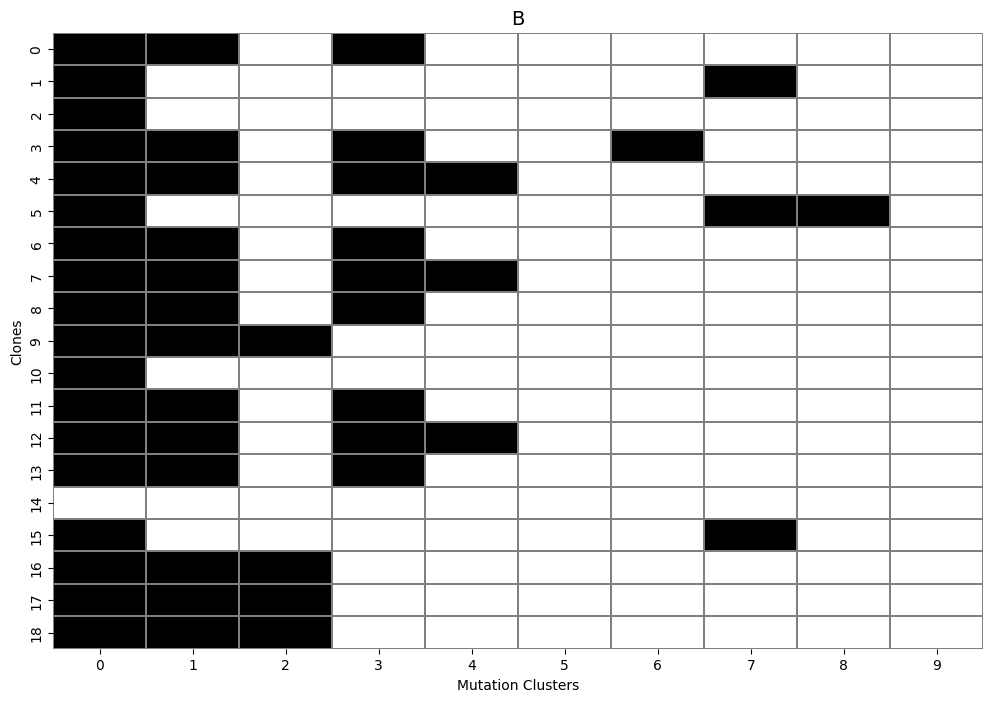

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(B,
            cmap=sns.color_palette(["white", "black"]),  # 0=white, 1=green
            cbar=False,
            linewidths=0.2,
            linecolor="grey")

plt.title("B", fontsize=14)
plt.xlabel("Mutation Clusters")
plt.ylabel("Clones")
plt.show()


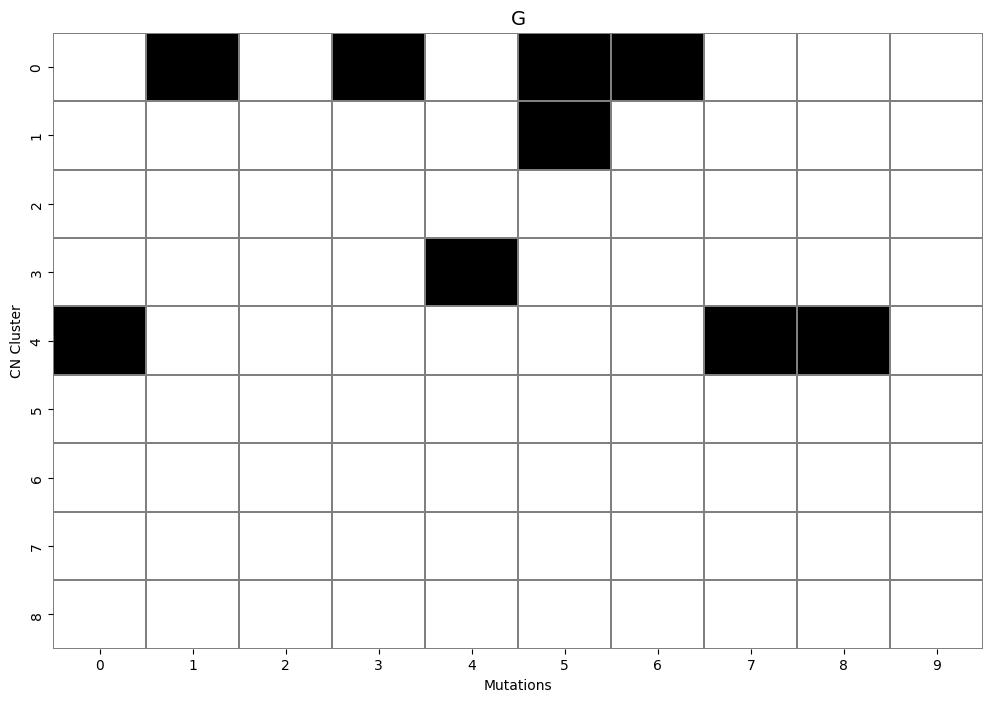

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(G,
            cmap=sns.color_palette(["white", "black"]),  # 0=white, 1=green
            cbar=False,
            linewidths=0.2,
            linecolor="grey")

plt.title("G", fontsize=14)
plt.xlabel("Mutations")
plt.ylabel("CN Cluster")
plt.show()


In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def generate_perfect_phylogeny(df_binary):

    solT_mut = nx.DiGraph()
    solT_mut.add_node('root')

    solT_cell = nx.DiGraph()
    solT_cell.add_node('root')

    df_binary = df_binary[df_binary.sum().sort_values(ascending=False).index]    

    for cell_id, row in df_binary.iterrows():
        if cell_id == 'root':
            continue

        curr_node = 'root'
        for column in df_binary.columns[row.values == 1]:
            if column in solT_mut[curr_node]:
                curr_node = column
            else:
                if column in solT_mut.nodes:
                    raise NameError(f'{column} is being repeated')
                solT_mut.add_edge(curr_node, column)
                solT_cell.add_edge(curr_node, column)
                curr_node = column

        solT_cell.add_edge(curr_node, cell_id)   

    return solT_mut, solT_cell

In [40]:
solT_mut, solT_cell = generate_perfect_phylogeny(B)

In [272]:
# !sudo apt-get install graphviz graphviz-dev
# !pip install pygraphviz

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_86093/1672807080.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


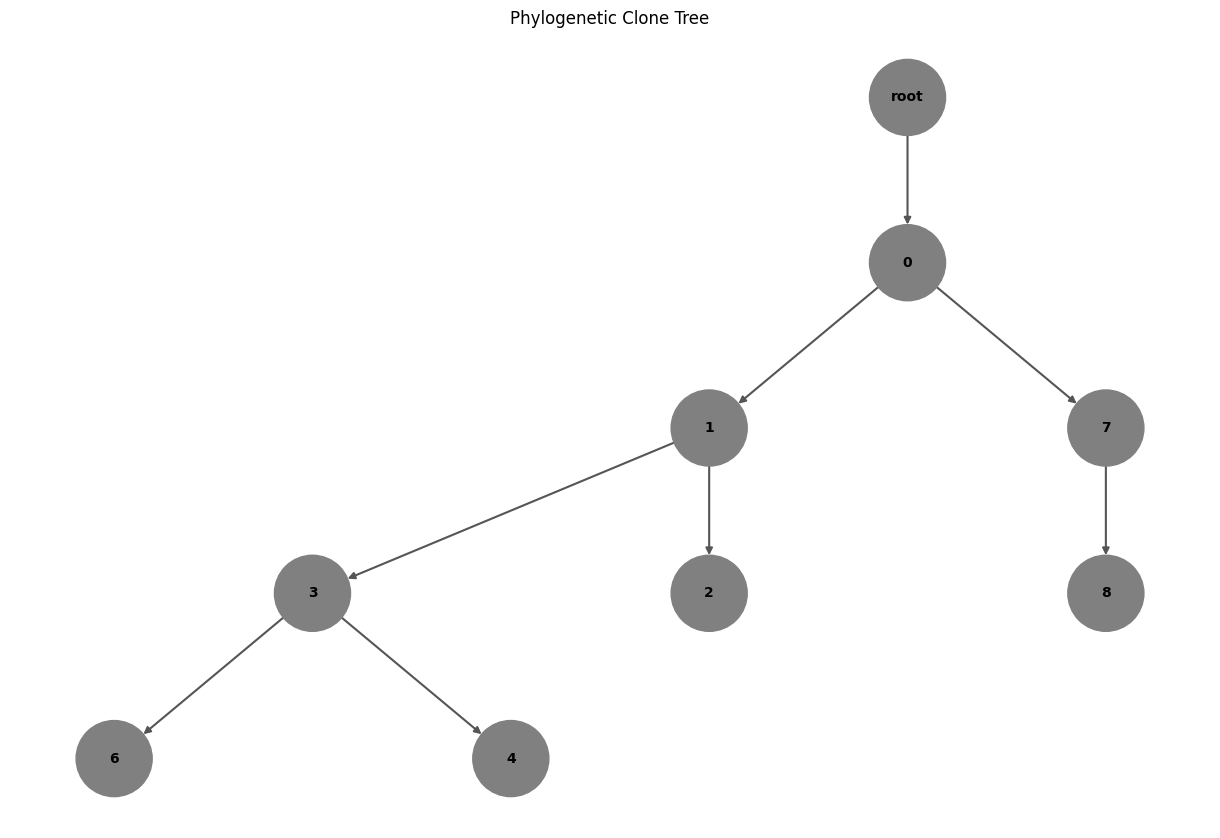

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches



def draw_clone_tree(T):

    # Create labels with concise formatting
    labels = {node: str(node) for node in T.nodes()}

    # Use graphviz 'dot' layout for hierarchical structure
    pos = nx.nx_agraph.graphviz_layout(T, prog="dot", args="-Gnodesep=.5 -Granksep=50")

    def get_node_color(node_name):
        return "grey"


    node_colors = [get_node_color(str(node)) for node in T.nodes()]

    # Create figure with adjusted size
    plt.figure(figsize=(12, 8))

    # Draw the tree with node colors
    nx.draw(
        T,
        pos,
        labels=labels,
        font_size=10,
        font_weight="bold",
        node_size=3000,
        edge_color="#555555",
        width=1.5,
        arrows=True,
        node_color=node_colors
    )


    plt.title("Phylogenetic Clone Tree", fontsize=12, pad=0)
    plt.tight_layout()
    plt.show()


draw_clone_tree(solT_mut)

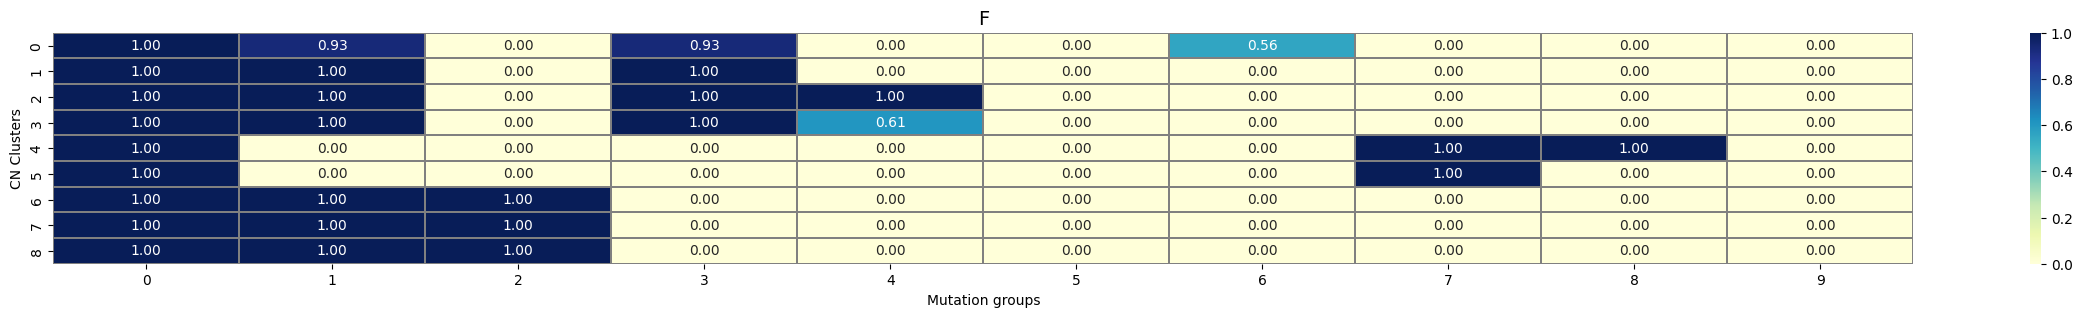

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,3))

sns.heatmap(F.astype(float),
            annot=True,       # print values inside
            fmt=".2f",        # format to 2 decimals
            cmap="YlGnBu",    # color map (yellow→green→blue)
            cbar=True,
            linewidths=0.2,
            linecolor="grey")

plt.title("F", fontsize=14)
plt.xlabel("Mutation groups")
plt.ylabel("CN Clusters")
plt.show()


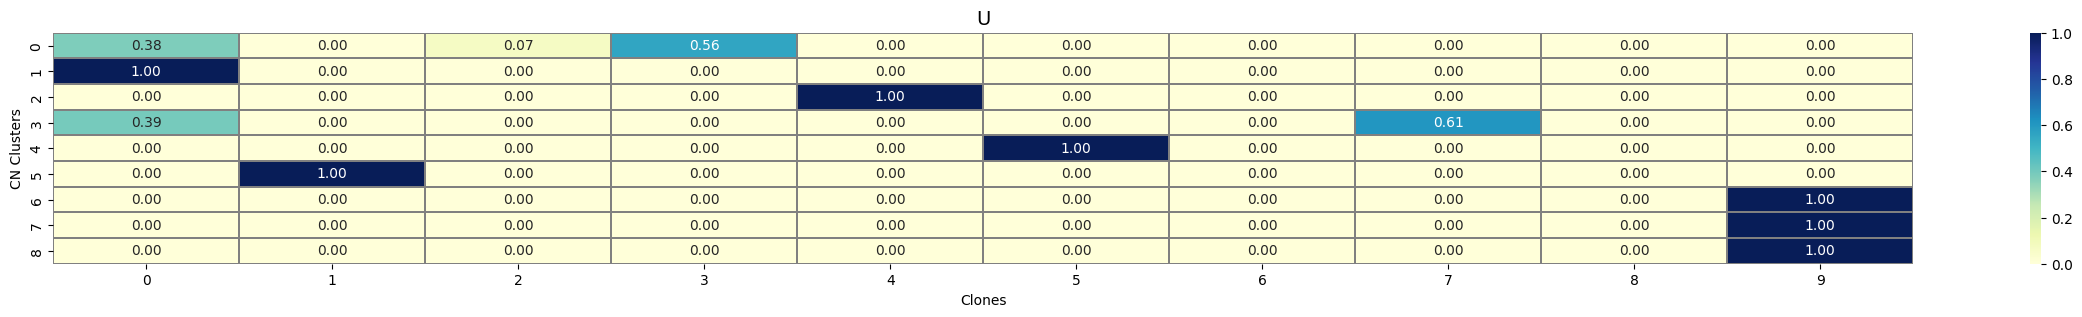

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,3))

sns.heatmap(U.astype(float),
            annot=True,       # print values inside
            fmt=".2f",        # format to 2 decimals
            cmap="YlGnBu",    # color map (yellow→green→blue)
            cbar=True,
            linewidths=0.2,
            linecolor="grey")

plt.title("U", fontsize=14)
plt.xlabel("Clones")
plt.ylabel("CN Clusters")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_clone_tree(T):

    # Create labels with concise formatting
    labels = {node: str(node) for node in T.nodes()}

    # Use graphviz 'dot' layout for hierarchical structure
    pos = nx.nx_agraph.graphviz_layout(T, prog="dot", args="-Gnodesep=.5 -Granksep=50")

    # Define a color map by first letter
    color_map = {
        'A': 'red',
        'B': 'blue',
        'C': 'green',
        'D': 'orange',
        'E': 'purple',
    }

    # Assign colors to nodes based on first letter (default: gray if unknown)
    node_colors = [
        color_map.get(str(node)[0], "gray") for node in T.nodes()
    ]

    # Create figure with adjusted size
    plt.figure(figsize=(12, 8))

    # Draw the tree with node colors
    nx.draw(
        T,
        pos,
        labels=labels,
        font_size=7,
        font_weight="bold",
        node_size=1000,
        edge_color="#555555",
        width=1.5,
        arrows=True,
        node_color=node_colors
    )

    # Add title and adjust layout
    plt.title("Phylogenetic Clone Tree", fontsize=12, pad=0)
    plt.tight_layout()
    plt.show()


In [ ]:
F_

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [238]:
df_nodes = pd.read_csv("../data/laks/ov2295_nodes.csv.gz")
df_nodes

,variant_id,node,loss,origin,presence,ml_origin,ml_presence,ml_loss
0,10:100129846:C:A,0,0.000000e+00,4.573674e-05,0.000000e+00,0,0,0
1,10:100129846:C:A,1,4.542663e-05,3.979706e-41,3.101192e-07,0,0,0
2,10:100129846:C:A,2,3.080443e-07,3.926630e-41,2.074915e-09,0,0,0
3,10:100129846:C:A,3,2.074915e-09,8.623432e-67,0.000000e+00,0,0,0
4,10:100129846:C:A,4,2.074915e-09,8.588990e-55,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...
239151,X:99571629:G:T,12,4.783274e-116,9.932175e-01,6.782464e-03,1,1,0
239152,X:99571629:G:T,13,6.894618e-84,1.015949e-30,1.000000e+00,0,1,0
239153,X:99571629:G:T,14,6.980025e-69,1.003518e-45,1.000000e+00,0,1,0
239154,X:99571629:G:T,15,6.653350e-18,1.052790e-96,1.000000e+00,0,1,0


In [ ]:
df_phertilizer_mutations["mutation"]

,cluster,mutation,mutation_
0,7,chr10_10:100129846:C:A,10:100129846:C:A
1,7,chr10_10:100185101:A:G,10:100185101:A:G
2,0,chr10_10:100209326:T:C,10:100209326:T:C
3,7,chr10_10:100283942:C:T,10:100283942:C:T
4,5,chr10_10:10086005:G:T,10:10086005:G:T
...,...,...,...
13827,2,chrX_X:98278474:C:A,X:98278474:C:A
13828,4,chrX_X:98452192:T:C,X:98452192:T:C
13829,0,chrX_X:98700894:C:T,X:98700894:C:T
13830,7,chrX_X:99136386:C:T,X:99136386:C:T
